In [524]:
%matplotlib inline
import torch
import numpy
import pickle
import matplotlib.pyplot as plot

In [525]:
shp_original_img = (100, 100)  # Shape of the original image
broken_image =  torch.FloatTensor( pickle.load(open('./broken_image_t.p', 'rb'),encoding='latin1' ) )
# broken_image = pickle.load(open('mysterious_image_t.p', 'rb'),encoding='latin1' ) # mysterious_image is a vector representing the morphed image

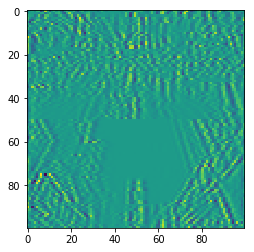

In [526]:
plot.imshow(  numpy.reshape(broken_image, (100,100)))

In [527]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for ii in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if ii % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [528]:
def distance_loss(hypothesis, broken_image):
    
    return torch.dist(hypothesis, broken_image, 2)
#     return (hypothesis - broken_image).pow(2).sum()

In [529]:
random_tensor = torch.randn(10000, dtype = torch.float)
print(random_tensor)
print(weird_function(random_tensor))

tensor([ 1.2152,  0.6619, -1.2074,  ..., -0.5314, -0.1318, -0.2406])
tensor([ 0.0291, -0.0690,  0.0348,  ...,  0.0798, -0.1522, -0.0340])


In [523]:
lr = 0.8
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at ', i, ' = ', loss.item())
    


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

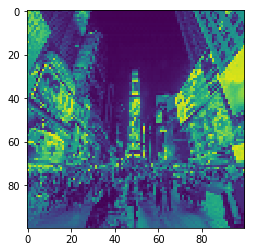

In [520]:

plot.imshow(  random_tensor.view(100,100).data  )

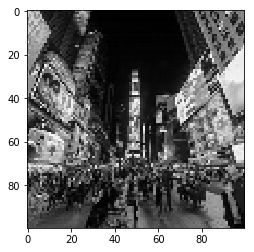

In [521]:
plot.imshow(  random_tensor.view(100,100).data,cmap = 'gray')


In [ ]:
#Sources are based on https://github.com/jcjohnson/pytorch-examples, NYU Intro2ML